In [1]:
%load_ext autoreload
%autoreload 2

# set which GPU to use
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4"
from main_simple_lib import *

2024-05-22 15:54:45.002243: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 15:54:45.134601: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 15:54:46.164786: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-05-22 15:54:46.164847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

VISION BACKBONE USE GRADIENT CHECKPOINTING:  False


/home/guests/elias.wohlgemuth/miniconda3/envs/viperexl2/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
Loading model: ./pretrained_models/CodeLlama-13B-it-exl2/4.0bpw/


In [2]:
# create df from csv
import pandas as pd
df = pd.read_csv('results/OR-multimodal/inspect_seg_label_performance.csv')

Is there a instrument table?

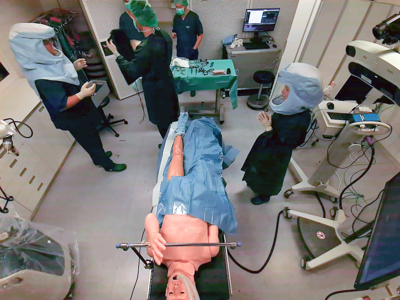

Ground Truth: yes

def execute_command(image):
    # Answer is:
    image_patch = ImagePatch(image)
    instrument_table_patches = image_patch.find("instrument table")
    if len(instrument_table_patches) != 0:
        return "yes"
    else:
        return "no"

Output()

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

image_patch =

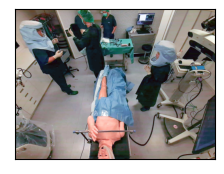

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

instrument_table_patches[0] =

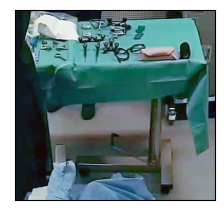

instrument_table_patches[1] =

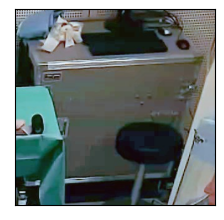

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

len(instrument_table_patches) = 2

0 = 0

len(instrument_table_patches) != 0 = True

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

"yes" = yes

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = yes

'yes'

In [10]:
# instrument table

sample_idx = 4  # 0-4
# 0: find detects table
#    correct answer
# 1: exists confirms table
#    correct answer
# 2: instrument table almost completely occluded, so that find has no chance to detect it
#    finds other table however
#    wrong answer
# 3: exists (using blip) gets passed wrong table detection and correctly says it is not instrument table
#    wrong answer
# 4: same frame, other perspective, find detects instrument table (highest match) and other table
#    correct answer


row = df.iloc[sample_idx]
# get row values
code_lines = row['code']
syntax = Syntax(code_lines, "python", theme="monokai", line_numbers=True, start_line=0)
code = code_lines, syntax
query = row['query']
answer = row['answer']
im = load_image(row['img_path'])
im_name = row['img_path'].split('/')[-1]
print(query)
show_single_image(im)
print(f"Ground Truth: {answer}")
print(code_lines)
execute_code(code, (im, im_name), show_intermediate_steps=True, visualize=True)

Is there a drill?

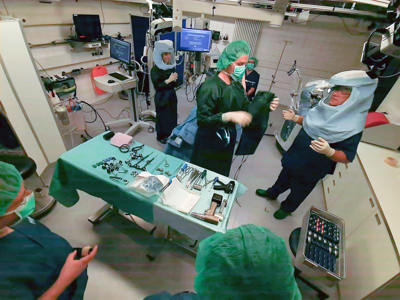

Ground Truth: no

def execute_command(image):
    # Answer is:
    image_patch = ImagePatch(image)
    drill_exists = image_patch.exists("drill")
    return bool_to_yesno(drill_exists)

Output()

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

image_patch =

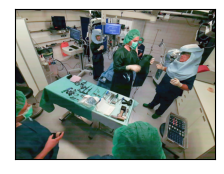

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

drill_exists = False

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

bool_to_yesno(drill_exists) = no

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = no

'no'

In [12]:
# drill

sample_idx = 6  # 5-6
# 5: find detects drill, but drill is not segmented on instrument table, i.e. missing in GT
#    wrong answer
# 6: exists denies drill detection
#    "correct" answer to wrong GT
# drill in other images, where it is segmented while being held, is never detected

row = df.iloc[sample_idx]
# get row values
code_lines = row['code']
syntax = Syntax(code_lines, "python", theme="monokai", line_numbers=True, start_line=0)
code = code_lines, syntax
query = row['query']
answer = row['answer']
im = load_image(row['img_path'])
im_name = row['img_path'].split('/')[-1]
print(query)
show_single_image(im)
print(f"Ground Truth: {answer}")
print(code_lines)
execute_code(code, (im, im_name), show_intermediate_steps=True, visualize=True)

Is there a hammer?

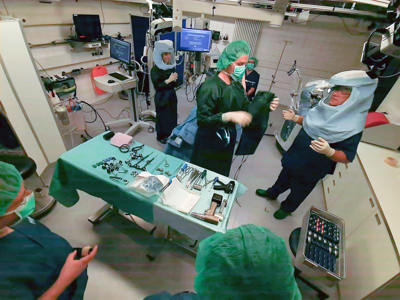

Ground Truth: no

def execute_command(image):
    # Answer is:
    image_patch = ImagePatch(image)
    hammer_exists = image_patch.exists("hammer")
    return bool_to_yesno(hammer_exists)

Output()

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

image_patch =

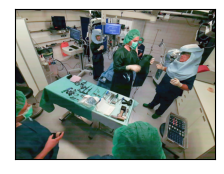

/home/guests/elias.wohlgemuth/miniconda3/envs/viperexl2/lib/python3.10/site-packages/transformers/generation/config
uration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is 
only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

hammer_exists = False

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

bool_to_yesno(hammer_exists) = no

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = no

'no'

In [31]:
# hammer

sample_idx = 8  # 7-8
# 7: find has detection but of wrong instrument
# 8: exists denies proposed detection


row = df.iloc[sample_idx]
# get row values
code_lines = row['code']
syntax = Syntax(code_lines, "python", theme="monokai", line_numbers=True, start_line=0)
code = code_lines, syntax
query = row['query']
answer = row['answer']
im = load_image(row['img_path'])
im_name = row['img_path'].split('/')[-1]
print(query)
show_single_image(im)
print(f"Ground Truth: {answer}")
print(code_lines)
execute_code(code, (im, im_name), show_intermediate_steps=True, visualize=True)

Is there a anesthesia equipment?

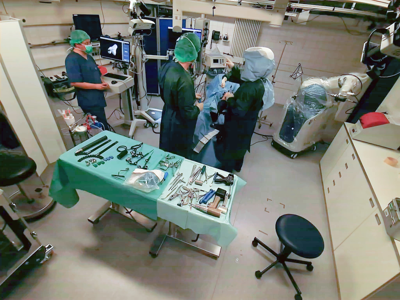

Ground Truth: yes

def execute_command(image):
    # Answer is:
    image_patch = ImagePatch(image)
    anesthesia_equipment_patch = image_patch.find("anesthesia equipment")
    if len(anesthesia_equipment_patch) != 0:
        return "yes"
    else:
        return "no"

Output()

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

image_patch =

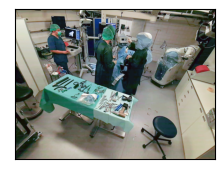

/home/guests/elias.wohlgemuth/miniconda3/envs/viperexl2/lib/python3.10/site-packages/torch/utils/checkpoint.py:460:
UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The 
default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass 
use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the 
differences between the two variants.
  warnings.warn(

/home/guests/elias.wohlgemuth/miniconda3/envs/viperexl2/lib/python3.10/site-packages/transformers/modeling_utils.py
:977: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(

/home/guests/elias.wohlgemuth/miniconda3/envs/viperexl2/lib/python3.10/site-packages/torch/nn/functional.py:4158: 
UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

anesthesia_equipment_patch[0] =

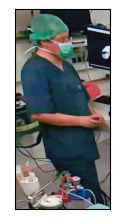

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

len(anesthesia_equipment_patch) = 1

0 = 0

len(anesthesia_equipment_patch) != 0 = True

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

"yes" = yes

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = yes

'yes'

In [34]:
# anesthesia equipment

sample_idx = 10  # 9-10
# 9: find detects liquid containers, likely due to "equipment" in query
#    exists confirms wrong detection
# 10: find detects equipment and person
#     exists denies wrong detection

row = df.iloc[sample_idx]
# get row values
code_lines = row['code']
syntax = Syntax(code_lines, "python", theme="monokai", line_numbers=True, start_line=0)
code = code_lines, syntax
query = row['query']
answer = row['answer']
im = load_image(row['img_path'])
im_name = row['img_path'].split('/')[-1]
print(query)
show_single_image(im)
print(f"Ground Truth: {answer}")
print(code_lines)
execute_code(code, (im, im_name), show_intermediate_steps=True, visualize=True)